In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#there is not missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Changing the wrong types
df['TotalCharges']=pd.to_numeric(df['TotalCharges'] , errors = 'coerce')
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Because of change from object to float This led to an appearance 11 missing values
df['TotalCharges'].isna().sum()

11

we will fill them with the result of multiplying the tenure and MonthlyCharges columns. Since the first represents the number of months that the customer was in the company, and the second indicates the amount paid per month.

In [7]:
df['TotalCharges'].fillna(df.tenure *  df.MonthlyCharges , inplace=True)

In [8]:
df['TotalCharges'].isna().sum()

0

In [9]:
#there is not a duplicate values
df.duplicated().sum()

0

# **Explore the data**

In [10]:
df.describe().round()

,tenure,MonthlyCharges,TotalCharges
count,7043.0,7043.0,7043.0
mean,32.0,65.0,2280.0
std,25.0,30.0,2267.0
min,0.0,18.0,0.0
25%,9.0,36.0,399.0
50%,29.0,70.0,1395.0
75%,55.0,90.0,3787.0
max,72.0,119.0,8685.0


You notice that there are clients who made a MonthlyCharges, but the TotalCharges for them is zero, because the TotalCharges is the period of months spent by the customer(tenure) multiplied by the monthly payment and tenure is zero

In [11]:
wrong_value=df.query("TotalCharges ==0.0 & MonthlyCharges > 0")
wrong_value

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [12]:
df.loc[wrong_value.index, 'TotalCharges'] =wrong_value['MonthlyCharges']


In [13]:
df.query("TotalCharges ==0.0 & MonthlyCharges > 0")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# Q1: Is there a relationship between tenure and TotalCharges

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Relationship between months and total revenue')

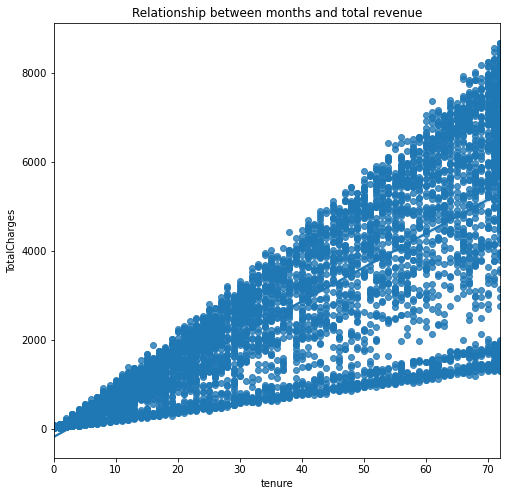

In [15]:
numerics = df[['MonthlyCharges' , 'TotalCharges' , 'tenure']]
plt.figure(figsize=(8,8))
sns.regplot(x='tenure' , y='TotalCharges' ,data=numerics)
plt.title('Relationship between months and total revenue')


 the longer the customer stays with us, the greater your total spend.

# Q2 Is there a relationship between MonthlyCharges and TotalCharges

Text(0.5, 1.0, 'Relationship between MonthlyCharges and total revenue')

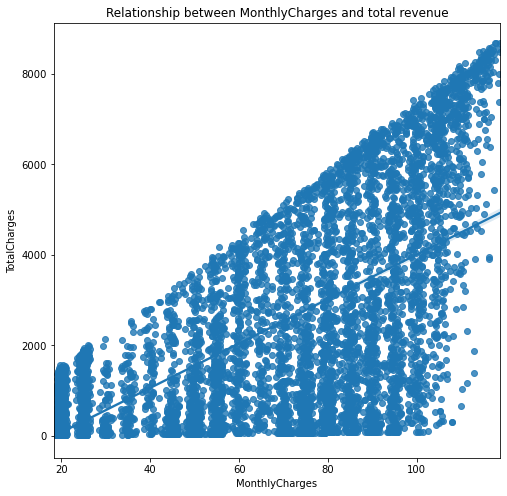

In [16]:
plt.figure(figsize=(8,8))
sns.regplot(x='MonthlyCharges' , y='TotalCharges' , data=numerics)
plt.title('Relationship between MonthlyCharges and total revenue')


**customers with higher monthly value, represent higher revenue.**

**We explore quantitive value ,Now let's explore the categorical variables.** 

In [17]:
df.describe(include = object)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,6933-VLYFX,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


* Most customers are not Senior;
* The most popular internet service is fiber optics;
*The most popular form of payment is the electronic payment


# Q3 elder people or young who pays more money?

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

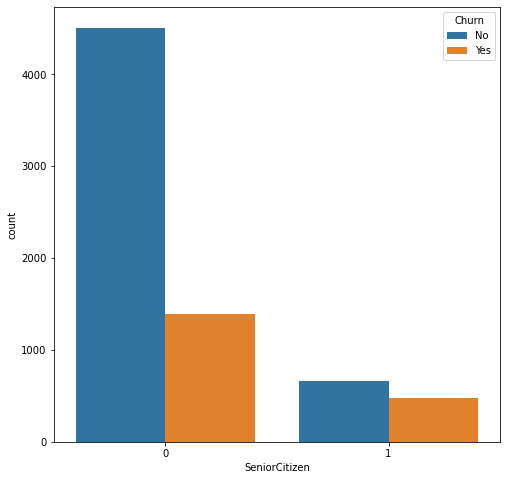

In [18]:
plt.figure(figsize =(8,8))
sns.countplot(data=df , x=df['SeniorCitizen'] , hue=df['Churn'])

In [19]:
df.groupby(df['SeniorCitizen']).mean().round()

,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,,,
0,32.0,62.0,2177.0
1,33.0,80.0,2810.0


<AxesSubplot:xlabel='SeniorCitizen', ylabel='TotalCharges'>

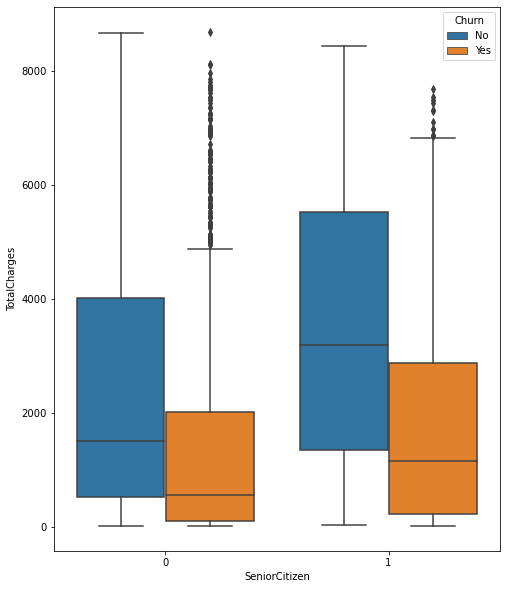

In [20]:
plt.figure(figsize =(8,10))
sns.boxplot(data=df , x=df['SeniorCitizen'] , y=df['TotalCharges'] , hue=df['Churn'])

In [21]:
df['SeniorCitizen'].value_counts(normalize=True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

Although they represent only 16% of clients, the elderly spend more in the company: It has a monthly average higher, leave more revenue and has a higher fidelity average. However, as we have seen, it has a much higher rate of evasion than the young public. The graphic makes this even clearer.

# Q4:Do men last longer or women?

<AxesSubplot:xlabel='gender', ylabel='count'>

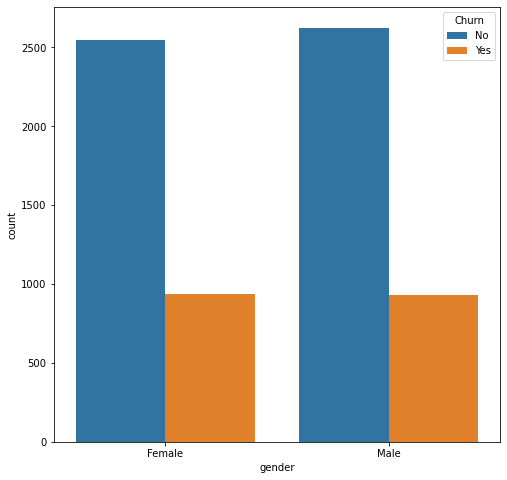

In [22]:
plt.figure(figsize =(8,8))
sns.countplot(data=df , x=df['gender'] , hue=df['Churn'])

In [23]:
df.groupby(df['gender']).mean().round()

,tenure,MonthlyCharges,TotalCharges
gender,,,
Female,32.0,65.0,2280.0
Male,32.0,64.0,2280.0


<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

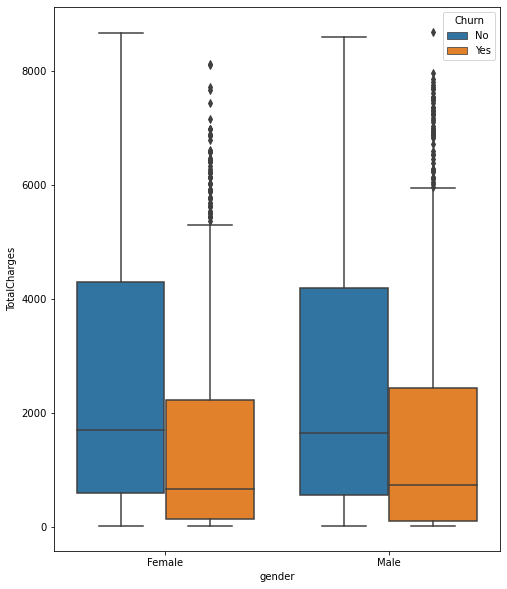

In [24]:
plt.figure(figsize=(8,10))
sns.boxplot(data=df , x=df['gender'] , y=df['TotalCharges'] , hue=df['Churn'])

the gender dosn't effect in Churn

In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<ipython-input-27-f773e1da7426>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(df['Partner'])['TotalCharges', 'MonthlyCharges', 'tenure'].mean().round().plot(


<AxesSubplot:xlabel='Partner'>

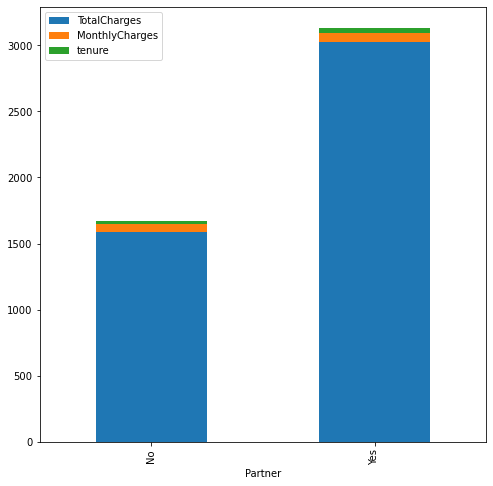

In [27]:
df.groupby(df['Partner'])['TotalCharges', 'MonthlyCharges', 'tenure'].mean().round().plot(
    kind = 'bar' , stacked=True , figsize=(8,8))

<AxesSubplot:xlabel='Partner'>

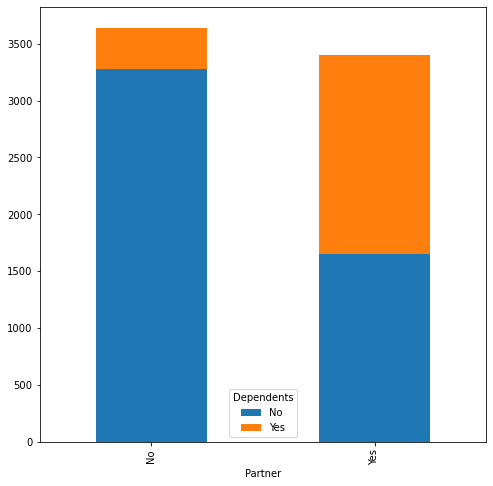

In [28]:
pd.crosstab(df['Partner'] , df['Dependents'] ).plot(kind = 'bar' , stacked=True , figsize=(8,8))

 people who has partners, has more dependents(children) than paids more money.



In [29]:
df['InternetService'].value_counts(normalize=True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

In [30]:
pd.crosstab(df['InternetService'] ,df['PhoneService'] , margins=True)

PhoneService,No,Yes,All
InternetService,,,
DSL,682,1739,2421
Fiber optic,0,3096,3096
No,0,1526,1526
All,682,6361,7043


all pepole they don't have phoneService They cannot subscribe to the Viber service

<AxesSubplot:xlabel='InternetService', ylabel='count'>

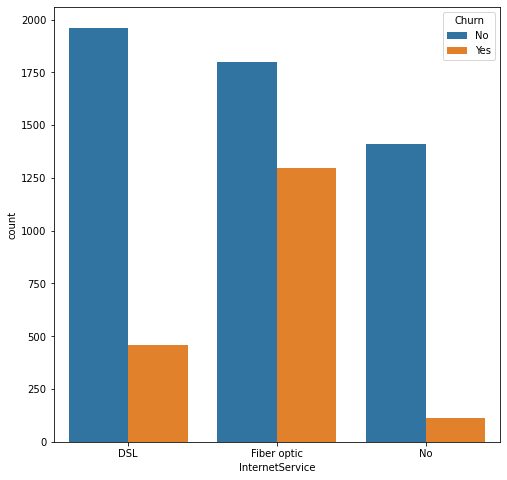

In [31]:
plt.figure(figsize=(8,8))
sns.countplot(data=df , x=df['InternetService'] , hue=df['Churn'])

<AxesSubplot:xlabel='InternetService', ylabel='TotalCharges'>

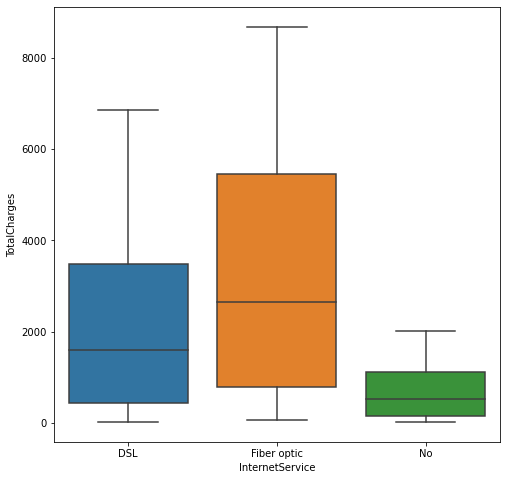

In [32]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df , x=df['InternetService'] , y=df['TotalCharges'])